<a href="https://colab.research.google.com/github/YuliiaUtkina/own/blob/main/%D0%A2T_AD2LYNX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from prettytable import PrettyTable
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Ad2Lynx Test Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828690 entries, 0 to 828689
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                828690 non-null  object 
 1   week                828690 non-null  int64  
 2   month               828690 non-null  int64  
 3   year                828690 non-null  int64  
 4   tracker             828690 non-null  object 
 5   group_id            828690 non-null  int64  
 6   group_name          828690 non-null  object 
 7   campaign_id         828690 non-null  int64  
 8   campaign_name       828690 non-null  object 
 9   parse_geo           828615 non-null  object 
 10  parse_category      828690 non-null  object 
 11  offer_id            828690 non-null  int64  
 12  offer_name          828690 non-null  object 
 13  clicks              828690 non-null  int64  
 14  leads               828690 non-null  int64  
 15  revenue             828690 non-nul

In [ ]:
unique_campaigns_count = df['campaign_id'].nunique()
print(f"Унікальна кількість кампаній: {unique_campaigns_count}")

Унікальна кількість кампаній: 11075


In [ ]:
campaigns_with_nan_roi = df[df['ROI'].isna()]['campaign_id'].nunique()
print("Унікальна кількість кампаній з порожніми значеннями ROI:", campaigns_with_nan_roi)

Унікальна кількість кампаній з порожніми значеннями ROI: 10786


In [ ]:
unique_regions_count = df['parse_geo'].nunique()
print(f"Унікальна кількість регіонів: {unique_regions_count}")

Унікальна кількість регіонів: 624


In [ ]:
unique_groups_count = df['group_id'].nunique()
print(f"Унікальна кількість груп кампаній: {unique_groups_count}")

Унікальна кількість груп кампаній: 70


In [ ]:
duplicates = df.duplicated()
# Перевірка на дублі
if duplicates.any():
    print("Є")
    print(df[duplicates])
else:
    print("Не знайдені")

Не знайдені


In [ ]:
df['date'] = pd.to_datetime(df['date'])
min_date = df['date'].min()
max_date = df['date'].max()
date_period = max_date - min_date

print("Мін дата:", min_date)
print("Макс дата:", max_date)
print("Період у днях:", date_period.days)

Мін дата: 2021-03-01 00:00:00
Макс дата: 2023-12-25 00:00:00
Період у днях: 1029


In [ ]:
# Створюю новий стовпець місяць/дата
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

df['month_year'] = pd.to_datetime(df['month'] + '-' + df['year'], format='%m-%Y').dt.to_period('M')

In [ ]:
df.head(3)

,date,week,month,year,tracker,group_id,group_name,campaign_id,campaign_name,parse_geo,...,clicks,leads,revenue,cost,Gross Profit,ROI,Bonus tech vitrina,Fix cost rate,SCV,month_year
0,2023-12-25,52,12,2023,binom_bestoffereu,34,v_lera_native,603,GR | amulet | Geozo | man | 13860,GR,...,81,0,0.0,3.645,-3.645,-1%,0.0,NaN,4.0,2023-12
1,2023-12-25,52,12,2023,binom_asia4,4,native_vitrina_asia4,2,MY-MS | Tizer Division,-,...,3,0,0.0,0.000,0.000,NaN,0.0,NaN,0.0,2023-12
2,2023-12-25,52,12,2023,binom_asia4,4,native_vitrina_asia4,2,MY-MS | Tizer Division,-,...,6,0,0.0,0.000,0.000,NaN,0.0,NaN,3.0,2023-12


**Загальні показники по всім кампаніям**:

In [ ]:
total_revenue = df['revenue'].sum()
total_cost = df['cost'].sum()
total_gross_profit = df['Gross Profit'].sum()

print(f"загальний дохід (Revenue): ${total_revenue:,.2f}")
print(f"Загальні витрати (Cost): ${total_cost:,.2f}")
print(f"Загальний прибуток (Gross Profit): ${total_gross_profit:,.2f}")

загальний дохід (Revenue): $42,864,279.73
Загальні витрати (Cost): $34,347,100.86
Загальний прибуток (Gross Profit): $8,517,178.87


**Підрахунок ROI**:

In [ ]:
def calculate_roi(row):
    if row['cost'] == 0:
        return 100 if row['revenue'] > 0 else 0
    return (row['revenue'] - row['cost']) / row['cost'] * 100

df['ROI_my'] = df.apply(calculate_roi, axis=1)

# Видалення символу '%' та конвертація рядка в числовий формат
df['ROI_format'] = df['ROI'].str.replace('%', '').astype(float)

print(df[['revenue', 'cost', 'ROI','ROI_my', 'ROI_format']].tail(5))

        revenue       cost                   ROI      ROI_my  ROI_format
828685      0.0    9.94856                   -1% -100.000000   -1.000000
828686    186.0  337.15400  -0.4483233181276212%  -44.832332   -0.448323
828687    215.0   75.64440   1.8422460882761973%  184.224609    1.842246
828688      0.0   75.21400                   -1% -100.000000   -1.000000
828689      0.0    0.12000                   -1% -100.000000   -1.000000


**ТОП 10 найбільш прибуткових і найбільш збиткових рекламних кампаній**:

In [ ]:
campaign_gross_profit = df.groupby('campaign_id')['Gross Profit'].sum().reset_index()

# Сортування даних для визначення топ-100 найбільш прибуткових кампаній
top_10_profitable = campaign_gross_profit.sort_values(by='Gross Profit', ascending=False).head(10)

# Сортування даних для визначення топ-100 найменш прибуткових кампаній (не окупились)
top_10_non_profitable = campaign_gross_profit.sort_values(by='Gross Profit', ascending=True).head(10)

# Виведення результатів на екран
print("Топ 10 найбільш прибуткових кампаній:")
print(top_10_profitable)
print("\nТоп 10 найменш прибуткових кампаній:")
print(top_10_non_profitable)

Топ 10 найбільш прибуткових кампаній:
      campaign_id  Gross Profit
3806         3833  615261.30807
4052         4081  511092.36671
4115         4144  350270.69518
4048         4077  346925.54201
1470         1481  321502.00000
1510         1521  232077.80740
11             12  128912.97484
33             34  113761.69688
13             14  105821.27447
139           140  102015.00366

Топ 10 найменш прибуткових кампаній:
      campaign_id  Gross Profit
0               1 -15856.075020
76             77 -11066.222140
81             82  -9992.198730
240           241  -8743.365400
92             93  -8357.185460
171           172  -6529.448764
214           215  -6454.182810
197           198  -6436.224740
132           133  -5922.821970
4207         4236  -4992.356400


**Динаміка Revenue/Cost:**

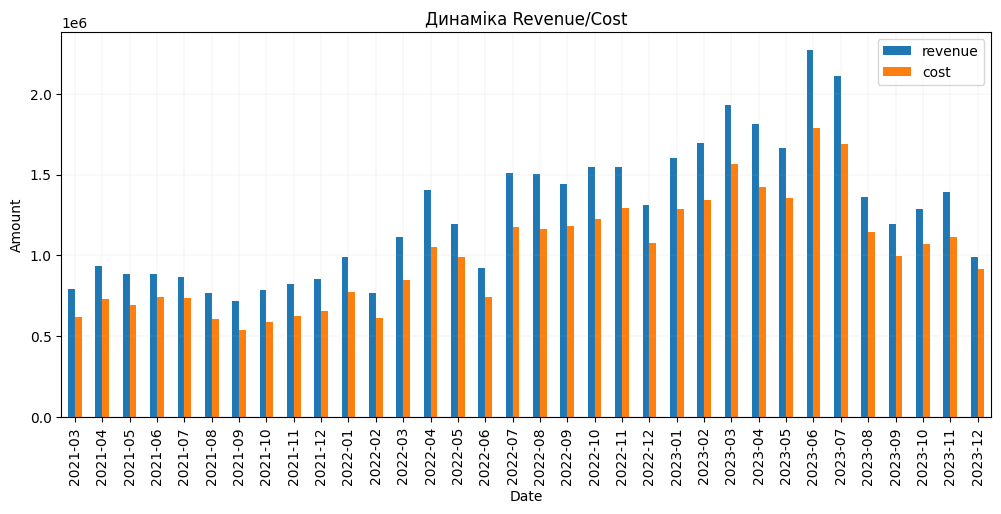

In [ ]:
df_viz = df[['month_year', 'revenue', 'cost']].groupby('month_year').sum()

df_viz.plot(kind='bar', figsize=(12, 5))
plt.title('Динаміка Revenue/Cost')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='-', linewidth=0.1)
plt.show()

**Динаміка Gross Profit:**

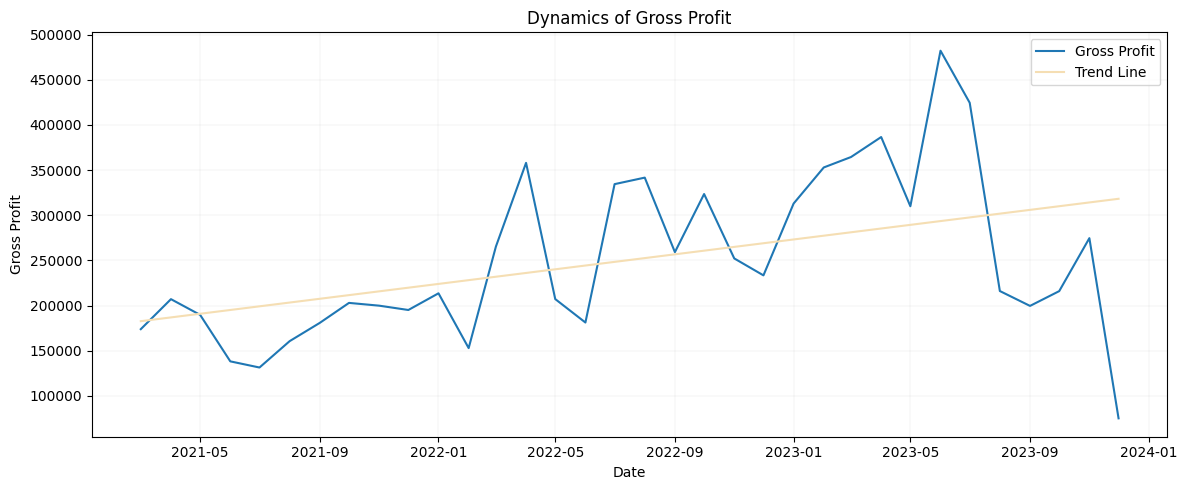

In [ ]:
# Груп за 'month_year' та сум 'Gross Profit'
gp_by_month_year = df.groupby('month_year')['Gross Profit'].sum().reset_index()
gp_by_month_year['month_year'] = gp_by_month_year['month_year'].dt.to_timestamp()  # Преобразование Period в Timestamp для визуализации

from scipy.stats import linregress

# Числовий формат для регресії
gp_by_month_year['date_num'] = gp_by_month_year['month_year'].apply(lambda x: x.toordinal())

# Лінійна регресія для тренду
slope, intercept, r_value, p_value, std_err = linregress(gp_by_month_year['date_num'], gp_by_month_year['Gross Profit'])

# Значення лінії тренду
gp_by_month_year['trend'] = intercept + slope * gp_by_month_year['date_num']

plt.figure(figsize=(12, 5))
plt.plot(gp_by_month_year['month_year'], gp_by_month_year['Gross Profit'], label='Gross Profit')
plt.plot(gp_by_month_year['month_year'], gp_by_month_year['trend'], label='Trend Line', color='wheat')
plt.title('Dynamics of Gross Profit')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.1)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

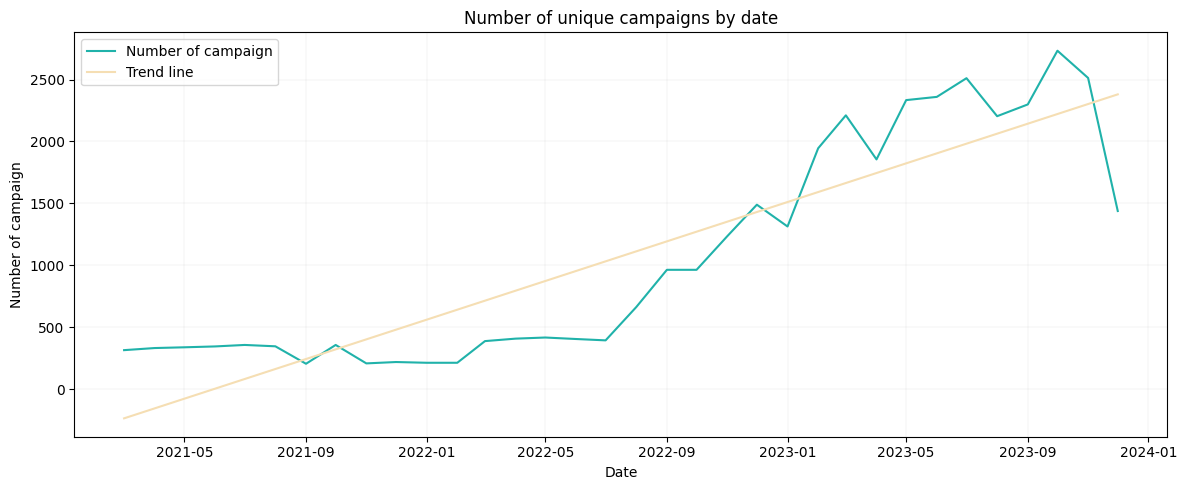

In [ ]:
campaign_counts_by_date = df.groupby('month_year')['campaign_id'].nunique()
campaign_counts_by_date.index = pd.PeriodIndex(campaign_counts_by_date.index, freq='M').to_timestamp()

# Індекс дат у числовий формат для регресії
date_nums = np.array([d.toordinal() for d in campaign_counts_by_date.index])

# Значення для тренду
y_values = campaign_counts_by_date.values
# Лінійна регресія
slope, intercept, r_value, p_value, std_err = linregress(date_nums, y_values)

# Розрахунок значень для лінії тренду
trend_values = intercept + slope * date_nums

plt.figure(figsize=(12, 5))
plt.plot(campaign_counts_by_date.index, campaign_counts_by_date.values, color='lightseagreen', label='Number of campaign')

plt.plot(campaign_counts_by_date.index, trend_values, color='wheat', label='Trend line')

plt.title('Number of unique campaigns by date')
plt.xlabel('Date')
plt.ylabel('Number of campaign')
plt.grid(True, which='both', linestyle='-', linewidth=0.1)
plt.legend()
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

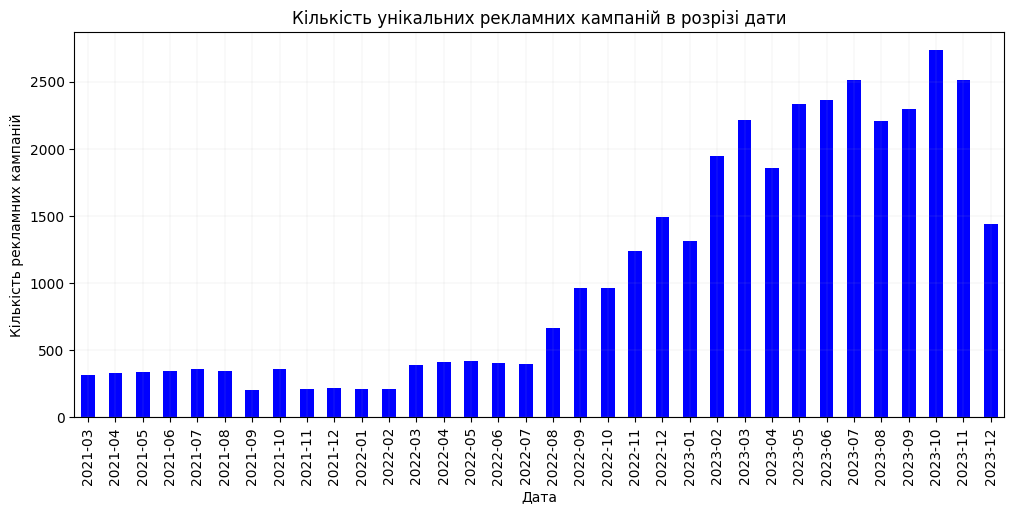

In [ ]:
campaign_counts_by_date = df.groupby('month_year')['campaign_id'].nunique()

campaign_counts_by_date.plot(kind='bar', figsize=(12, 5), color='blue', title=('Кількість унікальних рекламних кампаній в розрізі дати'))
plt.xlabel('Дата')
plt.ylabel('Кількість рекламних кампаній')
plt.grid(True, which='both', linestyle='-', linewidth=0.1)

plt.show()

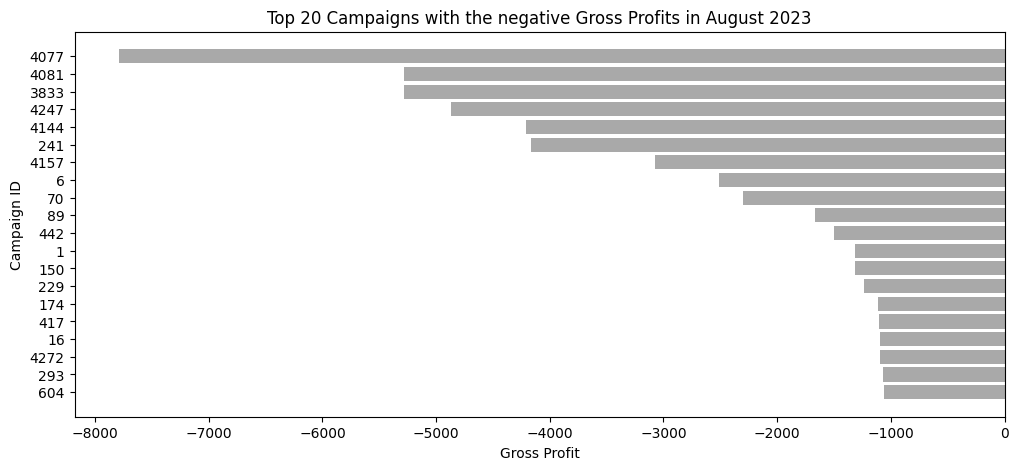

In [ ]:
df['date'] = pd.to_datetime(df['date'])
august_2023_data = df[(df['date'] >= '2023-08-01') & (df['date'] <= '2023-08-31')]


negative_profit_data = august_2023_data[august_2023_data['Gross Profit'] < 0]

campaign_gross_profit = negative_profit_data.groupby('campaign_id')['Gross Profit'].sum().reset_index()

# Найбільші збитки
sorted_negative_gp = campaign_gross_profit.sort_values('Gross Profit').head(20)

plt.figure(figsize=(12, 5))
plt.barh(sorted_negative_gp['campaign_id'].astype(str), sorted_negative_gp['Gross Profit'], color='darkgrey')
plt.xlabel('Gross Profit')
plt.ylabel('Campaign ID')
plt.title('Top 20 Campaigns with the negative Gross Profits in August 2023')
plt.gca().invert_yaxis()
plt.show()

**ТОП 20 кампаній за тривалістю (за загальною кількість днів у всій віборці)**:

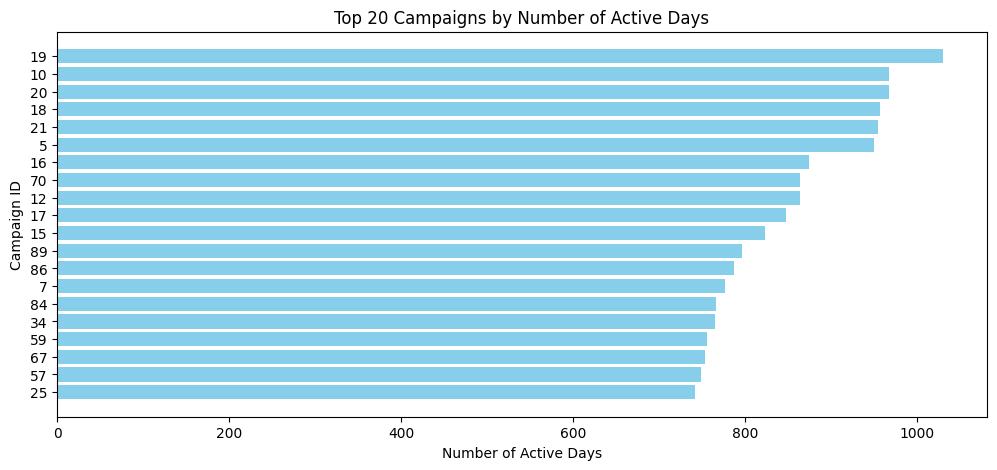

In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.date

# унікальні дні активності
campaign_active_days = df.groupby('campaign_id')['date'].nunique().reset_index()
campaign_active_days.columns = ['campaign_id', 'active_days']

top_campaigns_by_active_days = campaign_active_days.sort_values('active_days', ascending=False).head(20)


plt.figure(figsize=(12, 5))
plt.barh(top_campaigns_by_active_days['campaign_id'].astype(str), top_campaigns_by_active_days['active_days'], color='skyblue')
plt.xlabel('Number of Active Days')
plt.ylabel('Campaign ID')
plt.title('Top 20 Campaigns by Number of Active Days')
plt.gca().invert_yaxis()

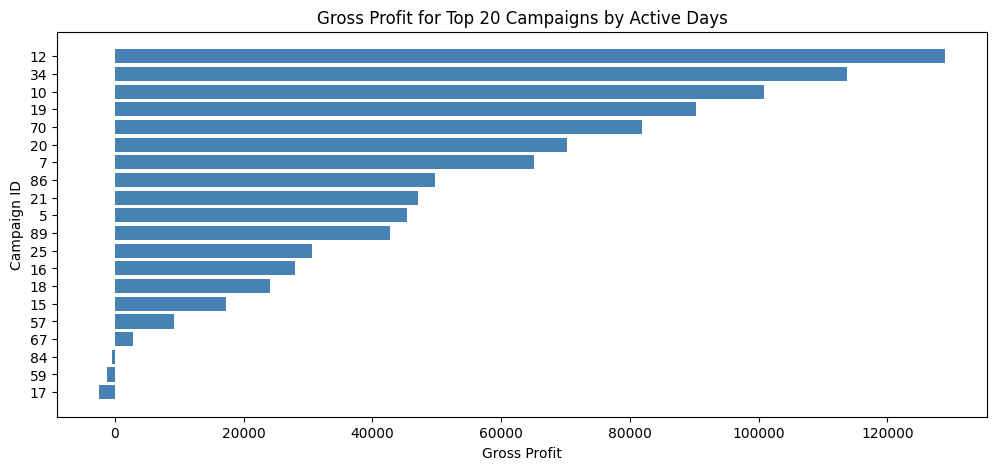

In [ ]:
# Сум Gross Profit для топ-20
gross_profit_top_campaigns = df[df['campaign_id'].isin(top_campaigns_by_active_days['campaign_id'])].groupby('campaign_id')['Gross Profit'].sum()

sorted_gross_profit = gross_profit_top_campaigns.loc[top_campaigns_by_active_days['campaign_id']].sort_values(ascending=True)

# Gross Profit
plt.figure(figsize=(12, 5))
plt.barh(sorted_gross_profit.index.astype(str), sorted_gross_profit, color='steelblue')
plt.xlabel('Gross Profit')
plt.ylabel('Campaign ID')
plt.title('Gross Profit for Top 20 Campaigns by Active Days')
plt.show()

In [ ]:
aggregated_data = df[df['campaign_id'].isin(top_campaigns_by_active_days['campaign_id'])].groupby('campaign_id').agg({
    'revenue': 'sum',
    'cost': 'sum',
    'Gross Profit': 'sum',
    'ROI_my': 'mean',
    'clicks': 'sum',
    'leads': 'sum'
}).reset_index()

# Розрахунок метрик
aggregated_data['Average ROI'] = (aggregated_data['Gross Profit'] / aggregated_data['cost'] * 100).fillna(0)
aggregated_data['Cost per Click'] = (aggregated_data['cost'] / aggregated_data['clicks']).fillna(0)
aggregated_data['Conversion Rate'] = (aggregated_data['leads'] / aggregated_data['clicks'] * 100).fillna(0)


from prettytable import PrettyTable

# Створення таблиці
table = PrettyTable()
table.field_names = ["Campaign ID", "Revenue", "Cost", "Gross Profit", "Clicks", "Leads", "Average ROI", "Average ROI_my", "Cost per Click", "Conversion Rate"]

for index, row in aggregated_data.iterrows():
    table.add_row([
        row['campaign_id'],
        f"${row['revenue']:,.2f}",
        f"${row['cost']:,.2f}",
        f"${row['Gross Profit']:,.2f}",
        row['clicks'],
        row['leads'],
        f"{row['Average ROI']:.2f}%",
        f"{row['ROI_my']:.2f}%",
        f"${row['Cost per Click']:.2f}",
        f"{row['Conversion Rate']:.2f}%"
    ])

print(table)

+-------------+---------------+---------------+--------------+------------+----------+-------------+----------------+----------------+-----------------+
| Campaign ID |    Revenue    |      Cost     | Gross Profit |   Clicks   |  Leads   | Average ROI | Average ROI_my | Cost per Click | Conversion Rate |
+-------------+---------------+---------------+--------------+------------+----------+-------------+----------------+----------------+-----------------+
|     5.0     |  $213,464.54  |  $168,057.99  |  $45,406.55  | 7273750.0  | 21865.0  |    27.02%   |    1731.71%    |     $0.02      |      0.30%      |
|     7.0     |  $325,042.71  |  $259,905.67  |  $65,137.04  | 4574871.0  | 115747.0 |    25.06%   |     -3.31%     |     $0.06      |      2.53%      |
|     10.0    |  $119,715.53  |   $18,861.99  | $100,853.54  | 1357260.0  |  7350.0  |   534.69%   |     10.96%     |     $0.01      |      0.54%      |
|     12.0    |  $876,892.48  |  $747,979.51  | $128,912.97  | 15258371.0 | 113023

**Загальний дохід та витрати в розрізі груп рекламних кампаній**:

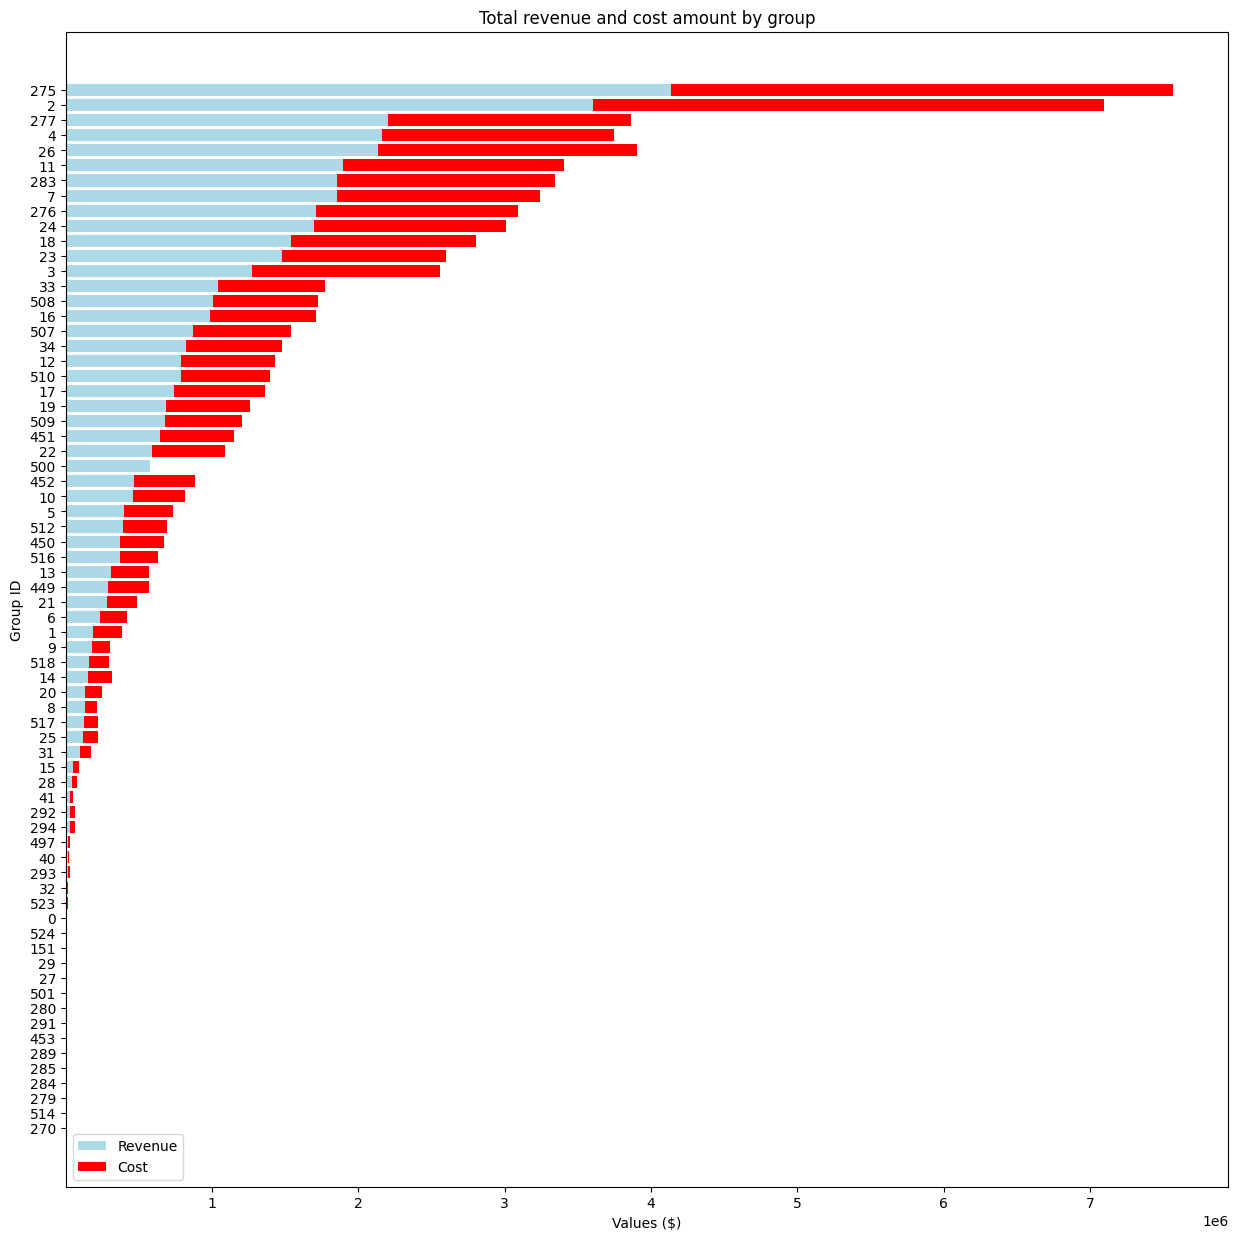

In [ ]:
grouped_data = df.groupby('group_id').agg({
    'revenue': 'sum',
    'cost': 'sum'
}).reset_index()

grouped_data = grouped_data.sort_values('revenue', ascending=False)

fig, ax = plt.subplots(figsize=(15,15))

bars1 = ax.barh(grouped_data['group_id'].astype(str), grouped_data['revenue'], color='lightblue', label='Revenue')
bars2 = ax.barh(grouped_data['group_id'].astype(str), grouped_data['cost'], color='red', label='Cost', left=grouped_data['revenue'])

ax.set_xlabel('Values ($)')
ax.set_ylabel('Group ID')
ax.set_title('Total revenue and cost amount by group')
ax.legend()

ax.invert_yaxis()

plt.show()

**ТОП 10 гео за прибутковістю**:

In [ ]:
region_gross_profit = df.groupby('parse_geo')['Gross Profit'].sum().reset_index()

# Сорт за сумою Gross Profit
top_regions = region_gross_profit.sort_values('Gross Profit', ascending=False).head(10)
print("Топ 10 регіонів за Gross Profit:")
print(top_regions)


Топ 10 регіонів за Gross Profit:
    parse_geo  Gross Profit
516        WW  2.063633e+06
410        TH  1.608177e+06
216        ID  1.347932e+06
457        US  6.753332e+05
233        IT  3.767415e+05
213        HU  2.010758e+05
130        DE  1.847175e+05
211        HR  1.421882e+05
162        ES  1.407563e+05
306        MY  1.237594e+05


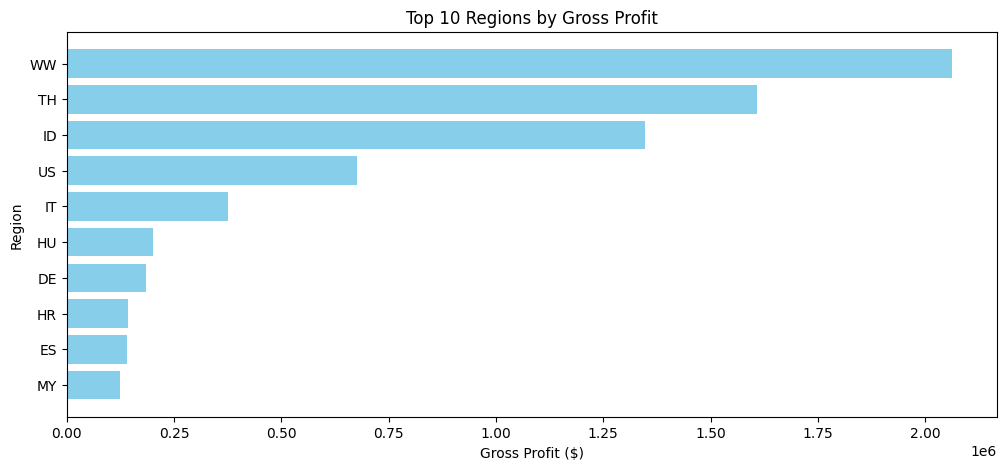

In [ ]:
plt.figure(figsize=(12, 5))
plt.barh(top_regions['parse_geo'], top_regions['Gross Profit'], color='skyblue')
plt.xlabel('Gross Profit ($)')
plt.ylabel('Region')
plt.title('Top 10 Regions by Gross Profit')
plt.gca().invert_yaxis()
plt.show()